In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils

### LAPLACIAN, SOBEL X AND Y, CANNY EDEGE DETECTION

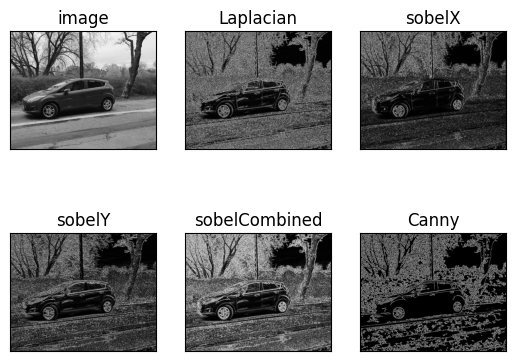

In [2]:
img = cv2.imread("car.png", cv2.IMREAD_GRAYSCALE)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
edges = cv2.Canny(img,50,300)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined', 'Canny']
images = [img, lap, sobelX, sobelY, sobelCombined, edges]
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

###     GAUSSIAN PYRAMID OF ONE IMAGE

In [3]:
img = cv2.imread("car.png", cv2.IMREAD_GRAYSCALE)
layer = img.copy()
gaussian_pyramid_list = [layer]

for i in range(6):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid_list.append(layer)
    cv2.imshow(str(i), layer)

cv2.imshow("Original image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### HOUGH TRASNFORM

In [ ]:
img = cv2.imread("images/sunflowers.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
cv2.imshow('edges', edges)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=300,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imshow('image', img)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

### HARRIS CORNER DETECTOR

In [ ]:
img = cv2.imread('checkboards/C1.jpg')

cv2.imshow('img', img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)


img[dst > 0.01 * dst.max()] = [0, 0, 255]

cv2.imshow('dst', img)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

#### DISPLAY IMAGE IN THREE DIFFERENT CHANNELS COLORS

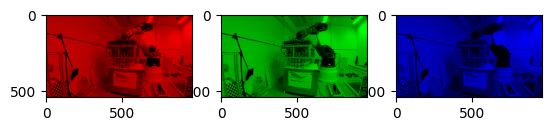

In [2]:

def loading(path):
    '''
    Load Image and show it on screen
    '''
    img = cv2.imread(path)
    cv2.imshow('Techfak', img)
    # waits for a key event for delay of 5000 milliseconds.
    cv2.waitKey(5000)


def Resizing(path):
    '''
    Resize the image by a factor of 0.5 in both directions.
    '''
    img = cv2.imread(path)
    small = cv2.resize(img, dsize=(0, 0), fx=0.5, fy=0.5)
    cv2.imshow('Techfak', small)
    cv2.waitKey()


def color_ch(path):
    '''
    Create three images, one for each channel (red, green, blue)
    Note : OpenCV stores images in BGR format.
    '''
    img = cv2.imread(path)
    img = cv2.resize(img, dsize=(0, 0), fx=0.5, fy=0.5)
    blue_ch = np.copy(img)
    green_ch = np.copy(img)
    red_ch = np.copy(img)

    red_ch[:, :, :2] = 0
    green_ch[:, :, [0,2]] = 0
    blue_ch[:, :, 1:] = 0

    # demonstration with cv2
    # Horizontally concatenate the 3 images
    img3 = cv2.hconcat([red_ch, green_ch, blue_ch])
    cv2.imshow('Techfak', img3)
    cv2.waitKey()

    # demonstration with matplotlib
    plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(red_ch, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(green_ch, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(blue_ch, cv2.COLOR_BGR2RGB))
    plt.show()





if __name__ == '__main__':
    loading('gopro_robot.jpg')
    Resizing('gopro_robot.jpg')
    color_ch('gopro_robot.jpg')

#### HARRIS DETECTOR

In [25]:
from skimage.feature import peak_local_max
from scipy.signal import argrelextrema

#### Compute Harris Corner Response 
R = Det(T ) − k Trace(T )^2

In [59]:
def show(name, img, x, y):
    windowStartX = 10
    windowStartY = 50
    windowXoffset = 5
    windowYoffset = 40

    w = img.shape[0] + windowXoffset
    h = img.shape[1] + windowYoffset

    cv2.namedWindow(name)
    cv2.moveWindow(name, windowStartX + w * x, windowStartY + h * y)
    cv2.imshow(name, img)
    cv2.waitKey(0)


def harrisResponseImage(img):
    '''
    Compute the spatial derivatives in x and y direction.

    :param img: input image
    :return: Harris response of the image
    '''
    dIdx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    dIdy = cv2.Sobel(img, cv2.CV_32F, 0, 1)

    ##########################################################
    ## Compute Ixx, Iyy, and Ixy with
    ## Ixx = (dI/dx) * (dI/dx),
    ## Iyy = (dI/dy) * (dI/dy),
    ## Ixy = (dI/dx) * (dI/dy).
    ## Note: The multiplication between the images is element-wise (not a matrix
    ## multiplication)!!

    Ixx = dIdx ** 2
    Iyy = dIdy ** 2
    Ixy = dIdx * dIdy

    ##########################################################
    ## Compute the images A,B, and C by blurring the
    ## images Ixx, Iyy, and Ixy with a
    ## Gaussian filter of size 3x3 and standard deviation of 1.

    kernelSize = (3, 3)
    sdev = 0.7
    A = cv2.GaussianBlur(Ixx, kernelSize, sdev)
    B = cv2.GaussianBlur(Iyy, kernelSize, sdev)
    C = cv2.GaussianBlur(Ixy, kernelSize, sdev)

    ##########################################################
    ## Compute the harris response with the following formula:
    ## R = Det - k * Trace*Trace
    ## Det = A * B - C * C
    ## Trace = A + B
    k = 0.06
    trace = A + B
    det = A * B - C * C
    response = det - k * (trace ** 2)

    ## Normalize the response image
    dbg = (response - np.min(response)) / (np.max(response) - np.min(response))
    dbg = dbg.astype(np.float32)
    show("Harris Response", dbg, 0, 2)

    ##########################################################
    # cv2.imwrite("dIdx.png", (abs(dIdx) * 255.0))
    # cv2.imwrite("dIdy.png", (abs(dIdy) * 255.0))

    # cv2.imwrite("A.png", (abs(A) * 5 * 255.0))
    # cv2.imwrite("B.png", (abs(B) * 5 * 255.0))
    # cv2.imwrite("C.png", (abs(C) * 5 * 255.0))

    # cv2.imwrite("response.png", np.uint8(dbg * 255.0))

    return response

In [60]:
input_img = cv2.imread('images/TestIm1.png')  ## read the image
input_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)  ## convert to grayscale
input_gray = (input_gray - np.min(input_gray)) / (np.max(input_gray) - np.min(input_gray))  ## normalize
input_gray = input_gray.astype(np.float32)  ## convert to float32 for filtering

## Obtain Harris Response, corners and edges
response = harrisResponseImage(input_gray)
print(response)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### 2 Corner Detection 

In [55]:
def harrisKeypoints(response, threshold=0.1):
    '''
    Generate a keypoint for a pixel,
    if the response is larger than the threshold
    and it is a local maximum.
    Don't generate keypoints at the image border.

    Note 1: Keypoints are stored with (x,y) and images are accessed with (y,x)!!

    Note 2: with changing k in the R equation, we detect different number of corners.
        k = 0.005 is the best according to this image.

    :param response: Harris response of an image
    :param threshold: Minimum intensity of peaks
    :return: list of the keypoints
    '''
    points = []
    maxima = peak_local_max(response, min_distance=1, threshold_abs=threshold)
    for maximum in maxima:
        points.append(cv2.KeyPoint(float(maximum[1]), float(maximum[0]), 1))

    return points

In [67]:
points = harrisKeypoints(response)
coordinates = [(kp.pt[0], kp.pt[1]) for kp in points]
# Print the coordinates
n =0
for x, y in coordinates:
    n+=1
    print(f"x: {x}, y: {y}", n)
imgKeypoints1 = cv2.drawKeypoints(input_img, points, outImage=None, color=(0, 255, 0))
show("Harris Keypoints", imgKeypoints1, 1, 2)

x: 29.0, y: 29.0 1
x: 149.0, y: 29.0 2
x: 29.0, y: 169.0 3
x: 150.0, y: 68.0 4
x: 98.0, y: 170.0 5
x: 249.0, y: 69.0 6
x: 99.0, y: 249.0 7
x: 249.0, y: 249.0 8
x: 179.0, y: 109.0 9
x: 209.0, y: 109.0 10
x: 179.0, y: 219.0 11
x: 209.0, y: 219.0 12
x: 149.0, y: 169.0 13


### PANORAMA STITCHING

#### 1 FINDING BEST MATCHES

In [77]:
def computeFeatures(image_data):
    # static thread_local Ptr<ORB> detector = cv::ORB::create(2000);
    # detector->(img, noArray(), keypoints, descriptors);
    # cout << "Found " << keypoints.size() << " ORB features on image " << id << endl;
    orb = cv2.ORB_create(nfeatures=500, scoreType=cv2.ORB_FAST_SCORE)
    keypoints, descriptors = orb.detectAndCompute(image_data['img'], None)
    print ("Found " + str(len(keypoints)) + " ORB features on image " + str(image_data['id']))

    image_data['keypoints'] = keypoints
    image_data['descriptors'] = descriptors

    return image_data

def createMatchImage(img1, img2, matches):
    img_matches = cv2.drawMatches(img1['img'], img1['keypoints'], img2['img'], img2['keypoints'], matches,
               outImg=None, matchColor=(0, 255, 0), singlePointColor=(0, 255, 0), flags=2)
    return img_matches

In [78]:
def matchknn2(descriptors1, descriptors2):
    '''
    Finds the two nearest neighbors for every descriptor in image 1
        i.e. the smallest and second smallest Hamming distance.
    Store the best match (smallest distance) in knnmatches[i][0]
        and the second best match in knnmatches[i][1].

    :descriptors1: ORB feature descriptors of the image 1
        shape: (num_features, 32)
    :descriptors2: ORB feature descriptors of the image 2
        shape: (num_features, 32)
    :return: a list of DMatch objects of nearest and second nearest neighbors
        of descriptor of image 1 in that of image 2.
    '''
    knnmatches = []
    for i in range(descriptors1.shape[0]):
        distance = []
        for ii in range(descriptors2.shape[0]):
            distance.append(cv2.norm(descriptors1[i], descriptors2[ii], cv2.NORM_HAMMING))
        distance = np.asarray(distance)
        distance_sorted = np.sort(distance)
        dm1 = cv2.DMatch(i, np.argmin(distance), np.min(distance))
        dm2 = cv2.DMatch(i, np.argwhere(distance == distance_sorted[1])[0,0], distance_sorted[1])
        knnmatches.append([dm1, dm2])

    return knnmatches


def ratioTest(knnmatches, ratio_threshold):
    '''
    Outlier Removal
    Compute the ratio between the nearest and second nearest neighbor.
    Add the nearest neighbor to the output matches if the ratio is smaller than ratio_threshold
    '''
    matches = []
    for distances in knnmatches:
        if (distances[0].distance / distances[1].distance) < ratio_threshold:
            matches.append(distances[0])
    return matches


def computeMatches(img1, img2):
    knnmatches = matchknn2(img1['descriptors'], img2['descriptors'])
    matches = ratioTest(knnmatches, 0.7)
    print ("(" + str(img1['id']) + "," + str(img2['id']) + ") found " + str(len(matches)) + " matches.")
    return matches

#### 2 HOMOGRAPHY

In [79]:
def computeHomography(points1, points2):
    '''
    Compute a homography matrix from 4 point matches.

    :points1: list of 4 points (tuple)
    :points2: list of 4 points (tuple)
    '''
    assert(len(points1) == 4)
    assert(len(points2) == 4)

    # 8x9 matrix A based on the formula from the manual sheet.
    A = np.zeros((8,9))
    for i in range(len(points1)):
        A[i*2:i*2 +2] = np.array([[-points1[i][0], -points1[i][1], -1, 0,0,0,
                                   points1[i][0]*points2[i][0], points1[i][1]*points2[i][0], points2[i][0]],
                          [0,0,0, -points1[i][0], -points1[i][1], -1,
                           points1[i][0]*points2[i][1], points1[i][1]*points2[i][1], points2[i][1]]])

    # SVD decomposition on A
    U, s, V_transposed = np.linalg.svd(A, full_matrices=True)
    V = np.transpose(V_transposed)

    # homogeneous solution of Ah=0 as the rightmost column vector of V.
    H = V[:,-1].reshape(3,3)

    # Normalize H by 1/h8.
    H /= V[:,-1][-1]

    return H



def testHomography():
    '''
    A small test to validate the implementation of computeHomography().
    '''
    points1 = [(1, 1), (3, 7), (2, -5), (10, 11)]
    points2 = [(25, 156), (51, -83), (-144, 5), (345, 15)]

    H = computeHomography(points1, points2)

    print ("Testing Homography...")
    print ("Your result:" + str(H))

    Href = np.array([[-151.2372466105457,   36.67990057507507,   130.7447340624461],
                 [-27.31264543681857,   10.22762978292494,   118.0943169422209],
                 [-0.04233528054472634, -0.3101691983762523, 1]])

    print ("Reference: " + str(Href))

    error = Href - H
    e   = np.linalg.norm(error)
    print ("Error: " + str(e))

    if (e < 1e-10):
        print ("Test: SUCCESS!")
    else:
        print ("Test: FAIL!")
    print ("============================")

#### 3 RANSAC

In [80]:
def numInliers(points1, points2, H, threshold):
    '''
    Computes the number of inliers for the given homography.
    - Project the image points from image 1 to image 2
    - A point is an inlier if the distance between the projected point and
        the point in image 2 is smaller than threshold.
    '''
    inlierCount = 0
    ## Hint: Construct a Homogeneous point of type 'Vec3' before applying H.
    points1_homog = np.vstack((points1, np.ones((1, points1.shape[1]))))
    points2_homog = np.vstack((points2, np.ones((1, points2.shape[1]))))
    points2_estimate_homog = H @ points1_homog
    points2_estimate = points2_estimate_homog / points2_estimate_homog[-1, :]
    distance_vector = np.sqrt(np.sum((points2_estimate - points2_homog) ** 2, axis=0))
    inlierCount = np.sum(distance_vector < threshold)
    return inlierCount


def computeHomographyRansac(img1, img2, matches, iterations, threshold):
    '''
    RANSAC algorithm.
    '''
    points1 = []
    points2 = []
    for i in range(len(matches)):
        points1.append(img1['keypoints'][matches[i].queryIdx].pt)
        points2.append(img2['keypoints'][matches[i].trainIdx].pt)

    bestInlierCount = 0
    for i in range(iterations):
        subset1 = []
        subset2 = []

        # Construct the subsets by randomly choosing 4 matches.
        for _ in range(4):
            idx = np.random.randint(0, len(points1) - 1)
            subset1.append(points1[idx])
            subset2.append(points2[idx])
        # Compute the homography for this subset
        H = computeHomography(subset1, subset2)

        # Compute the number of inliers
        inlierCount = numInliers(np.array(points1).T, np.array(points2).T, H, threshold)

        # Keep track of the best homography (use the variables bestH and bestInlierCount)
        if inlierCount > bestInlierCount:
            bestInlierCount = inlierCount
            bestH = H
    print("(" + str(img1['id']) + "," + str(img2['id']) + ") found " + str(bestInlierCount) + " RANSAC inliers.")
    return bestH

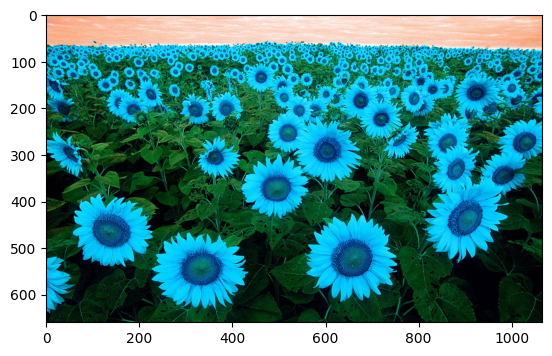

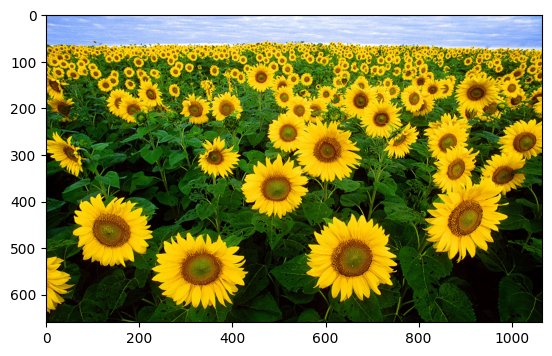

In [2]:
# INCORRECT: show the image without converting color spaces
img = cv2.imread('images/sunflowers.jpg')
plt.figure("Incorrect")
plt.imshow(img)

# CORRECT: convert color spaces before using plt.imshow
plt.figure("Correct")
plt.imshow(imutils.opencv2matplotlib(img))
plt.show()

In [26]:
import cv2
import numpy as np

def match_keypoints(img1, img2, nfeatures=1999):
    # Detect keypoints and descriptors using SIFT
    sift = cv2.SIFT_create(nfeatures=nfeatures)
    keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2, None)
    
    # Match descriptors using BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)
    
    pts1 = np.array([keypoints1[m.queryIdx].pt for m in matches])
    pts2 = np.array([keypoints2[m.trainIdx].pt for m in matches])
    
    return pts1, pts2, matches

def recover_pose_and_triangulate(K, pts1, pts2):
    # Compute the essential matrix
    E, mask = cv2.findEssentialMat(pts1, pts2, K, method=cv2.RANSAC)
    print(f'Inliers: {sum(mask)}')
    # Recover the pose
    _, R, t, mask_pose = cv2.recoverPose(E, pts1, pts2, K)
    print(f'Inliers in front of the camera: {sum(mask_pose)}')
    # Projection matrices
    P0 = np.hstack((np.eye(3), np.zeros((3, 1))))
    P1 = np.hstack((R, t))
    
    # Triangulate points
    pts1_hom = cv2.convertPointsToHomogeneous(pts1).reshape(-1, 3).T
    pts2_hom = cv2.convertPointsToHomogeneous(pts2).reshape(-1, 3).T
    
    points_4d_hom = cv2.triangulatePoints(K @ P0, K @ P1, pts1_hom[:2], pts2_hom[:2])
    points_3d = cv2.convertPointsFromHomogeneous(points_4d_hom.T)
    
    return points_3d, R, t

def solve_pnp_ransac(K, points_3d, pts2):
    # Use solvePnPRansac to filter points
    _, rvec, tvec, inliers = cv2.solvePnPRansac(points_3d, pts2, K, None)
    rot = cv2.Rodrigues(rvec)[0]
    # Project the 3D points back to the image plane
    points_2d_reproj, _ = cv2.projectPoints(points_3d, rvec, tvec, K, None)
    
    # Filter inliers
    inliers = inliers.flatten()
    points_3d_inliers = points_3d[inliers]
    
    return points_3d_inliers, rot, tvec

# Example usage
K = np.loadtxt('ex_11_Visual_Odometry/K.txt')
print(np.int16(K))

img1 = cv2.imread('ex_11_Visual_Odometry/sequence/000001.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('ex_11_Visual_Odometry/sequence/000002.png', cv2.IMREAD_GRAYSCALE)
import matplotlib.pyplot as plt

nfeatures=1999
pts1, pts2, matches = match_keypoints(img1, img2, nfeatures)
points_3d, R, t = recover_pose_and_triangulate(K, pts1, pts2)
all_points_2d = [K @ np.hstack((np.eye(3), np.zeros((3, 1))))]
all_keypoints = [pts1, pts2]
all_matches = [matches]


points_3d_inliers, rvec, tvec = solve_pnp_ransac(K, points_3d, pts2)

print("3D Points in front of the camera:\n", points_3d_inliers.shape[0])
print("Rotation matrix:\n", rvec)
print("Translation vector:\n", tvec)


[[3117    0 1501]
 [   0 3117  984]
 [   0    0    1]]
Inliers: [161]
Inliers in front of the camera: [172]
3D Points in front of the camera:
 784
Rotation matrix:
 [[ 0.99990929 -0.00989457 -0.00913801]
 [ 0.0103128   0.99884558  0.04691645]
 [ 0.00866324 -0.04700644  0.99885702]]
Translation vector:
 [[ 0.92495404]
 [-0.0650123 ]
 [-0.3752466 ]]
